In [3]:
from utils import makeGaussian
import matplotlib.pyplot as plt
import numpy as np
import galsim
from astropy.io import fits
import glob
import requests
from scipy.signal import convolve2d
baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"f8b890f757a331f81625fa23c3ef887f"}


ImportError: cannot import name 'makeGaussian' from 'utils' (unknown location)

In [128]:
def create_psf(fwhm, pxscale):


    %matplotlib inline
    N = 256
    X = np.linspace(-127, 127, N)
    Y = np.linspace(-127, 127, N)
    X, Y = np.meshgrid(X, Y)

    # Mean vector and covariance matrix
    mu = np.array([0, 0.])
    Sigma = np.array([[ fwhm/pxscale , 0], [0,  fwhm/pxscale]])

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    
    return np.exp(-fac/ 2) / N #* np.exp(-fac2/ 2) / N2

# The distribution on the variables X, Y packed into pos.
# Z = multivariate_gaussian(pos, mu, Sigma)
euc_psf = psf(0.17, 0.1)

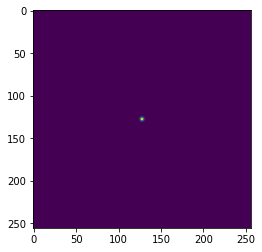

In [107]:
plt.imshow(euc_psf)

In [88]:
def MagToFlux(zp, mag):
    Flux = np.power(10, ((zp - mag)*0.4))
    return Flux

In [73]:
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

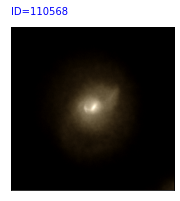

In [75]:
import matplotlib.image as mpimg
from io import BytesIO
# ids = np.random.randint(10000, 30000, 5)
# ids = [41092,338375,257378,110568,260067]
ids = [110568]
sub_count = 1
plt.figure(figsize=[15,3])

for id in ids:
     url = "http://www.tng-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(id)
     sub = get(url)
     
     # it is of course possible this data product does not exist for all requested subhalos
     if 'stellar_mocks' in sub['supplementary_data']: 
         # download PNG image, the version which includes all stars in the FoF halo (try replacing 'fof' with 'gz')
         png_url = sub['supplementary_data']['stellar_mocks']['image_fof']
         response = get(png_url)
         
         # make plot a bit nicer
         plt.subplot(1,len(ids),sub_count)
         plt.text(0,-20,"ID="+str(id),color='blue')
         plt.gca().axes.get_xaxis().set_ticks([])
         plt.gca().axes.get_yaxis().set_ticks([])
         sub_count += 1
         
         # plot the PNG binary data directly, without actually saving a .png file
         file_object = BytesIO(response.content)
         plt.imshow(mpimg.imread(file_object))

In [79]:
from PIL import Image

from numpy import asarray

# load the image

image = Image.open(file_object)

# convert image to numpy array

data = asarray(image)

In [83]:
data.shape

(254, 254, 4)

In [87]:
image_float = galsim.Image(254, 254)
image.array = data[..., 0]

In [ ]:
psfed = 

In [120]:
np.save('../SurViZ/data/tng_gal.npy', data[..., 0])

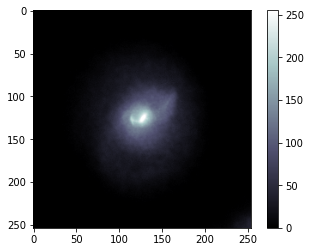

In [85]:
plt.figure()
plt.imshow(data[..., 0], cmap='bone')
plt.colorbar()

In [116]:
psfed = convolve2d(data[..., 0], euc_psf, mode='same')

In [ ]:
def regrid(data, out_x, out_y):
    m = max(data.shape[0], data.shape[1])
    y = np.linspace(0, 1.0/m, data.shape[0])
    x = np.linspace(0, 1.0/m, data.shape[1])
    interpolating_function = RegularGridInterpolator((y, x), data)

    yv, xv = np.meshgrid(np.linspace(0, 1.0/m, out_y), np.linspace(0, 1.0/m, out_x))

    return interpolating_function((xv, yv))

In [141]:
import cv2

In [153]:
257 * (0.02/0.1)

51.4

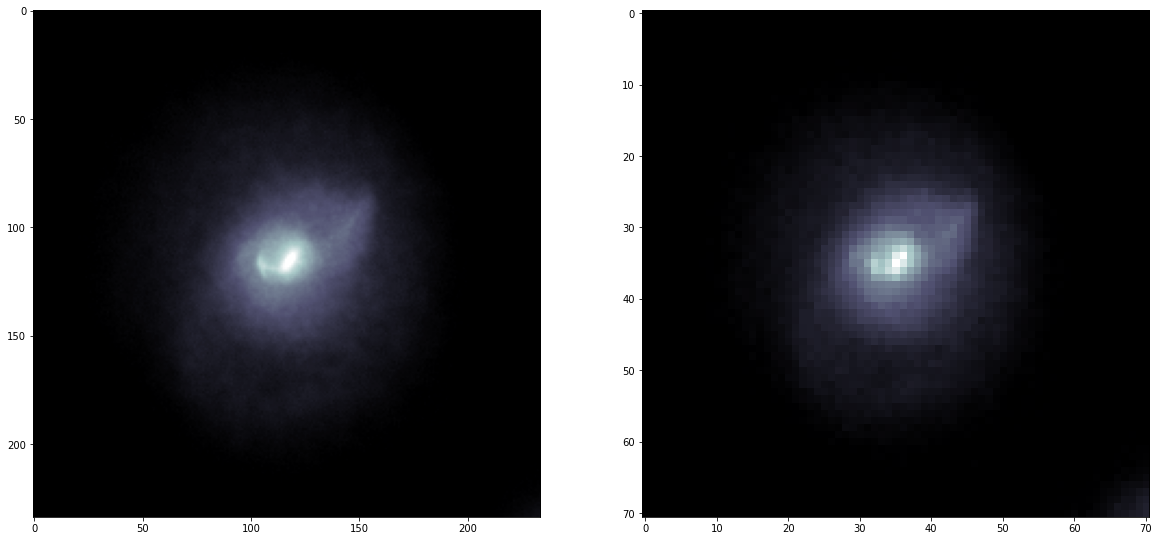

In [159]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(data[10:-10, 10:-10, 0], cmap='bone')
ax[1].imshow(res, cmap='bone')

In [170]:
def create_gal(pxscale, fwhm, noise_level, show=False):
    img = np.load('../SurViZ/data/tng_gal.npy')[10:-1, 10:-10]
    s = int(237 * 0.03/pxscale)
    size = (s, s)
    psf = create_psf(2*fwhm, pxscale)
    psfed = convolve2d(img, psf, mode='same')
    res = cv2.resize(psfed, dsize=size, interpolation=cv2.INTER_CUBIC)

    noisy = res/1000+np.random.normal(0, noise_level, size)
    if show:
        plt.figure()
        plt.imshow(noisy, cmap='bone')
    return noisy


In [178]:
x = np.ones(128)
np.shape(np.diag(x))

(128, 128)

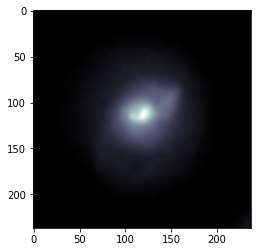

In [181]:
gal = create_gal(0.03, 0.067, 0.0003, show=True)
np.save('../SurViZ/data/gal_HST_WCS_HST_Cosmos.npy', gal)

In [ ]:
np.save('../SurViZ/data/gal_Euclid_VIS_Wide-Survey.npy')

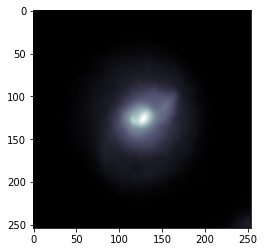

In [139]:
create_gal(0.1, 0.2, 0.003, show=True)

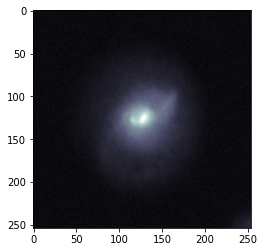

In [119]:
plt.imshow(psfed/1000+np.random.normal(0, 0.003, (254, 254)), cmap='bone')

In [96]:
pxscale = 0.1
zp = 25.9

image_float = galsim.ImageF(254, 254)
print(image_float.bounds)
image_float.array[:, :] = data[..., 0]
print(np.shape(image_float.array))
flux = MagToFlux(25.9, 19)
psf = galsim.Gaussian(flux=1., fwhm=0.1)
gal = galsim.Convolve(psf, image_float)
gal = gal.withFlux(flux)

stamp_size = 254
stamp_gal = galsim.ImageF(stamp_size, stamp_size, scale=pxscale)
stamp = gal.drawImage(stamp_gal, method='no_pixel')

galsim.BoundsI(1,254,1,254)
(254, 254)


TypeError: Arguments to Convolution must be GSObjects, not galsim.Image(bounds=galsim.BoundsI(1,254,1,254), wcs=None, dtype=numpy.float32)

In [45]:
tng = fits.open('../SurViZ/data/broadband_437252.fits')

In [55]:
np.shape(tng[3].data)

(256, 256)

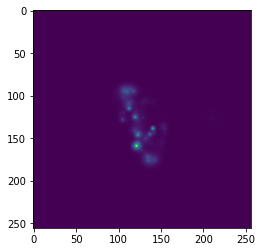

In [62]:
plt.imshow(tng[14].data[0])

In [53]:
deep = fits.open('/Users/hbretonniere/Downloads/deep_ssersic_1_vis.fits')[0].data[:100, :100]
wide = fits.open('/Users/hbretonniere/Downloads/wide_ssersic_2_vis.fits')[0].data[:100, :100]
nir_y_wide = fits.open('/Users/hbretonniere/Downloads/dsersic_0_y_nir.fits')[0].data[:100, :100]

In [54]:
print(np.std(deep), np.std(wide), np.std(nir_y_wide))
# print(np.mean(deep), np.mean(wide))

0.0004711246 0.002986744 0.00052393717


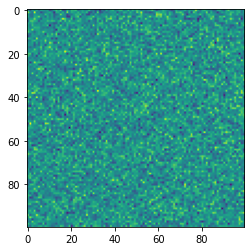

In [12]:
plt.imshow(deep)

In [5]:
import glob
catName = glob.glob('vis_0*')[0]
cat = galsim.Catalog(catName)


IndexError: list index out of range

In [14]:
divideFor = 20

# number of Galaxies you want to simulate
NumGal = 314*1000/(divideFor**2)  # 314709 in the list
print(f'Num gal to emulate : {NumGal}')
prefix = 'divided_by___'
# Constants and options
zp = 25.91
image_size_x = int(25000/divideFor)
image_size_y = int(25000/divideFor)
pixel_scale = 0.1
full_image = galsim.ImageF(image_size_x, image_size_y)
full_image.setOrigin(0, 0)

Num gal to emulate : 785.0


In [71]:
def sim_field(pxscale, fwhm, noise_level, zp):
    divideFor = 40
    NumGal = 314*1000/(divideFor**2)  # 314709 in the list
    image_size_x = int(25000/divideFor)
    image_size_y = int(25000/divideFor)
    full_image = galsim.ImageF(image_size_x, image_size_y)
    for i in range(int(NumGal)):
        stamp_size = 256
        stamp_gal = galsim.ImageF(stamp_size, stamp_size, scale=pxscale)
        gal_idx = i
        float_ix = cat.getFloat(gal_idx, 1) / divideFor
        float_iy = cat.getFloat(gal_idx, 2) / divideFor
        radiusBulge = cat.getFloat(i, 5)
        radiusDisk = cat.getFloat(i, 8)*1.678
        bt = cat.getFloat(i, 4)
        ell_B = cat.getFloat(i, 6)
        ell_D = cat.getFloat(i, 9)
        q = bt*ell_B + (1-bt)*ell_D
        mag = cat.getFloat(i, 3)
        Flux = MagToFlux(zp, mag)
        PA = cat.getFloat(i, 7)
        ix = int(cat.getFloat(i, 1) / divideFor)
        iy = int(cat.getFloat(i, 2) / divideFor)
        dx = float_ix - ix
        dy = float_iy - iy
        offset = galsim.PositionD(dx, dy)
        bulge = galsim.Sersic(4, radiusBulge, flux=1.0)
        b_shear = galsim.Shear(q=ell_B, beta=galsim.Angle(PA, galsim.radians))
        bulge = bulge.shear(b_shear)
        
        disk = galsim.Sersic(1, radiusDisk, flux=1.0)
        d_shear = galsim.Shear(q=ell_D, beta=galsim.Angle(PA, galsim.radians))
        disk = disk.shear(d_shear)
        gal = bulge + disk
        psf = galsim.Gaussian(flux=1., fwhm=fwhm)
        gal = galsim.Convolve(psf, gal)
        gal = gal.withFlux(Flux)
        stamp = gal.drawImage(stamp_gal, method='no_pixel')
        stamp.setCenter(ix, iy)
        bounds = stamp.bounds & full_image.bounds
        full_image[bounds] += stamp[bounds]
        full_image += np.random.normal(0, noise_level, (image_size_x, image_size_y))
    return full_image.array


In [60]:
vis_image = sim_field(0.1, 0.17, 0.0005, 25.94)
fits.writeto('../Surviz/data/Euclid_VIS_Deep-Survey.fits', vis_image, overwrite=True)
# plt.figure(figsize=(20,20))
# plt.imshow(nir_image)#, cmap='flag')

In [61]:
vis_image = sim_field(0.1, 0.17, 0.003, 25.94)
fits.writeto('../Surviz/data/Euclid_VIS_Wide-Survey.fits', vis_image, overwrite=True)
# plt.figure(figsize=(20,20))
# plt.imshow(nir_image)#, cmap='flag')a

In [62]:
nir_image = sim_field(0.3, 0.2, 0.0005, 25.04)
fits.writeto('../Surviz/data/Euclid_NIR_Deep-Survey.fits', nir_image, overwrite=True)
# plt.figure(figsize=(20,20))
# plt.imshow(nir_image)#, cmap='flag')

In [63]:
nir_image = sim_field(0.3, 0.2, 0.003, 25.04)
fits.writeto('../Surviz/data/Euclid_NIR_Wide-Survey.fits', nir_image, overwrite=True)
# plt.figure(figsize=(20,20))
# plt.imshow(nir_image)#, cmap='flag')

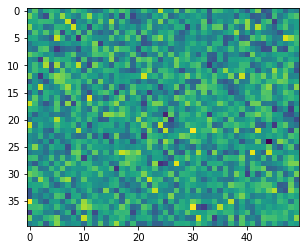

In [51]:
plt.imshow(nir_image[30:70, :50])

In [52]:
print(np.max(nir_image), np.std(nir_image[30:70, :50]))

2.5515623 0.0121660065


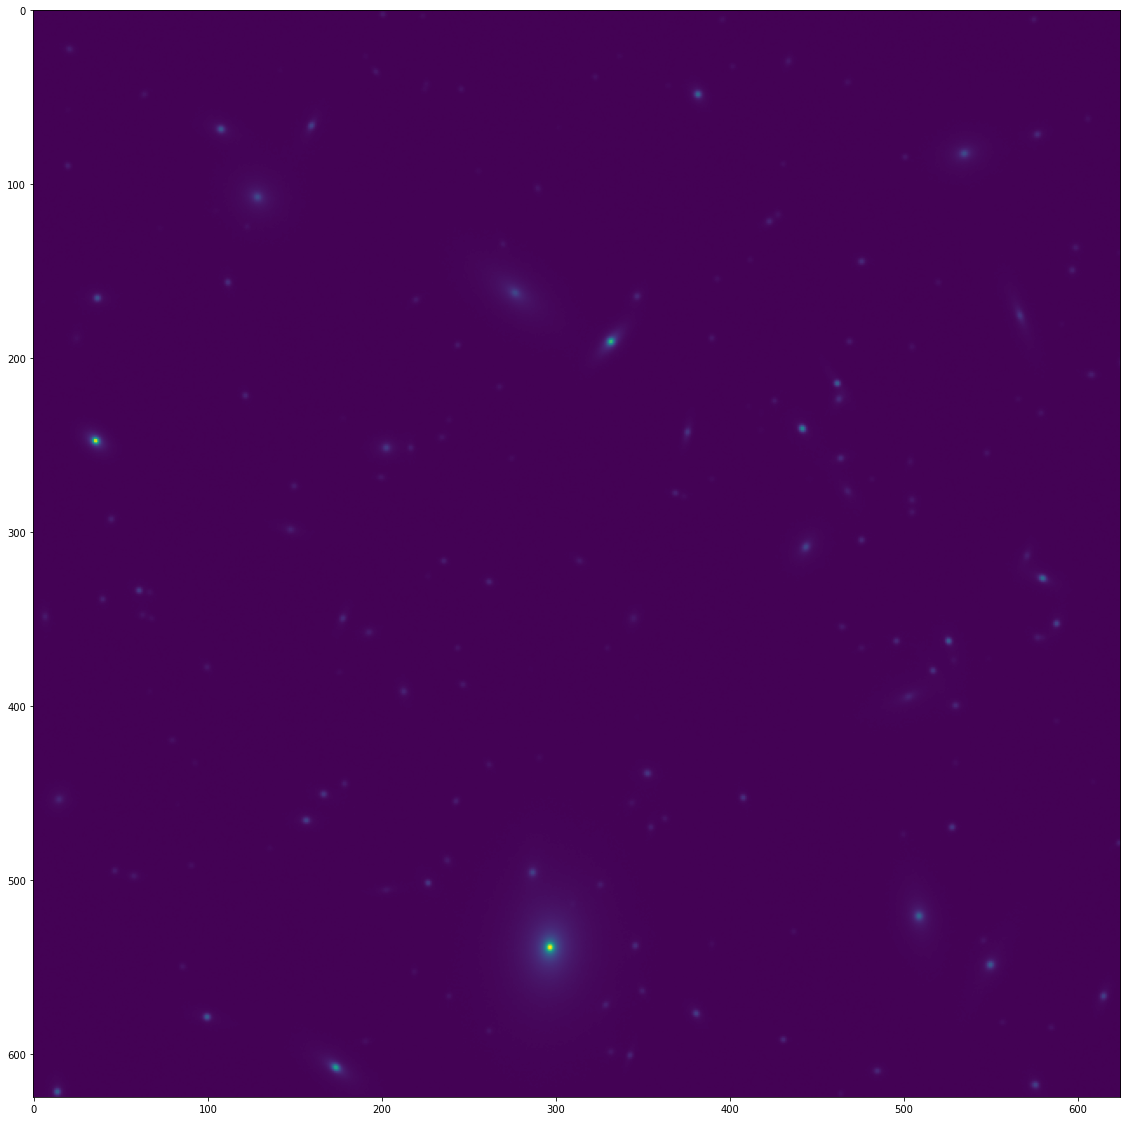

In [72]:
full_image = sim_field(0.031, 0.08, 0.0003, 27.9)
fits.writeto('../Surviz/data/JWST_NIRCAM_Jades.fits', full_image, overwrite=True)
plt.figure(figsize=(20,20))
plt.imshow(full_image)#, cmap='flag')

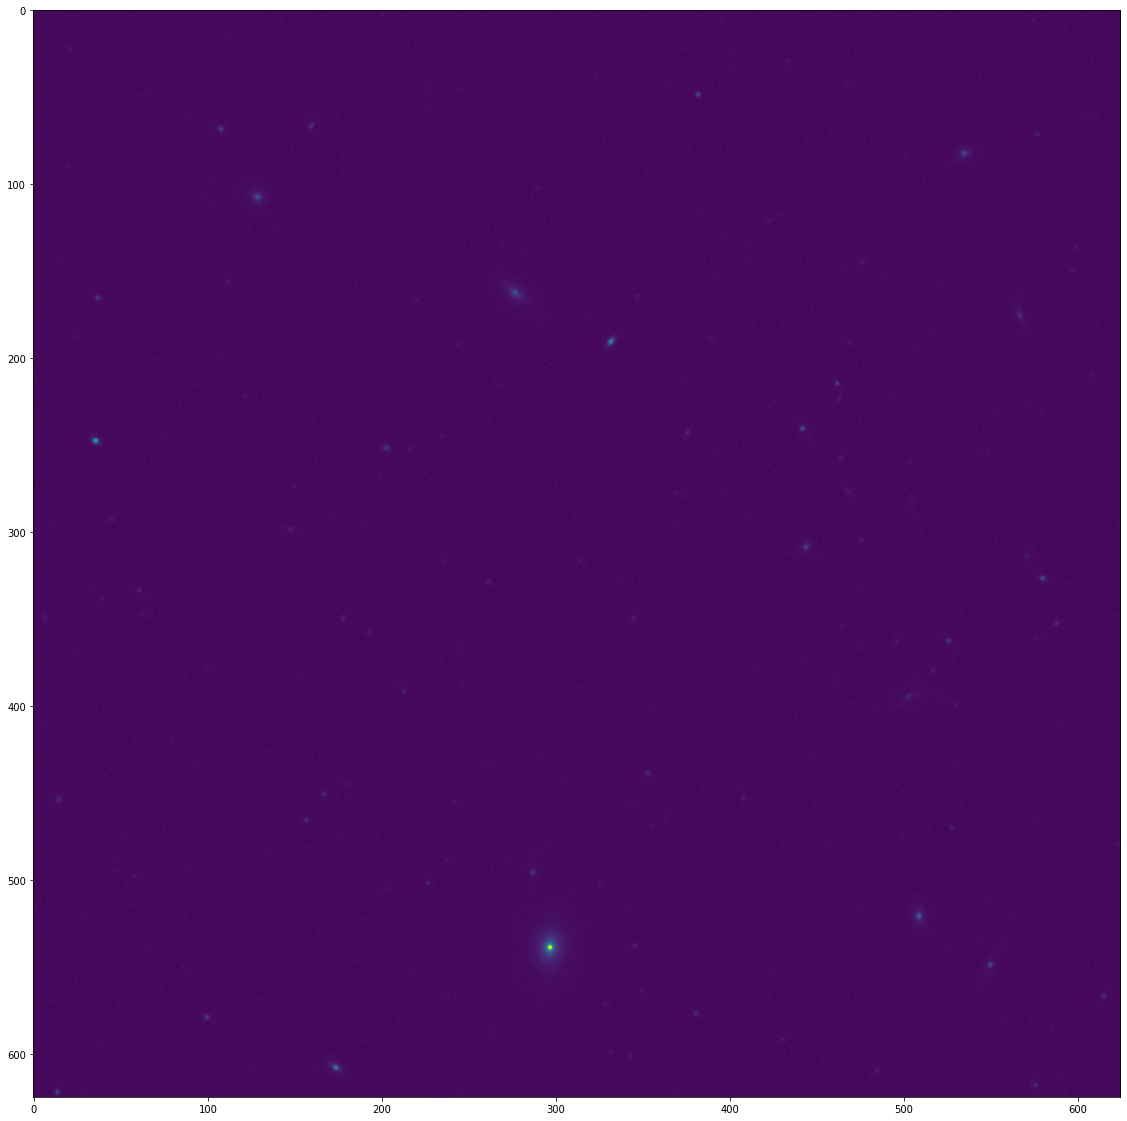

In [45]:
full_image = sim_field(0.1, 0.17, 0.003, 25.49)
fits.writeto('../Surviz/data/Euclid_NIR_Wide-Survey.fits', full_image, overwrite=True)
plt.figure(figsize=(20,20))
plt.imshow(full_image)#, cmap='flag')

In [46]:
np.max(full_image)

2.7890255

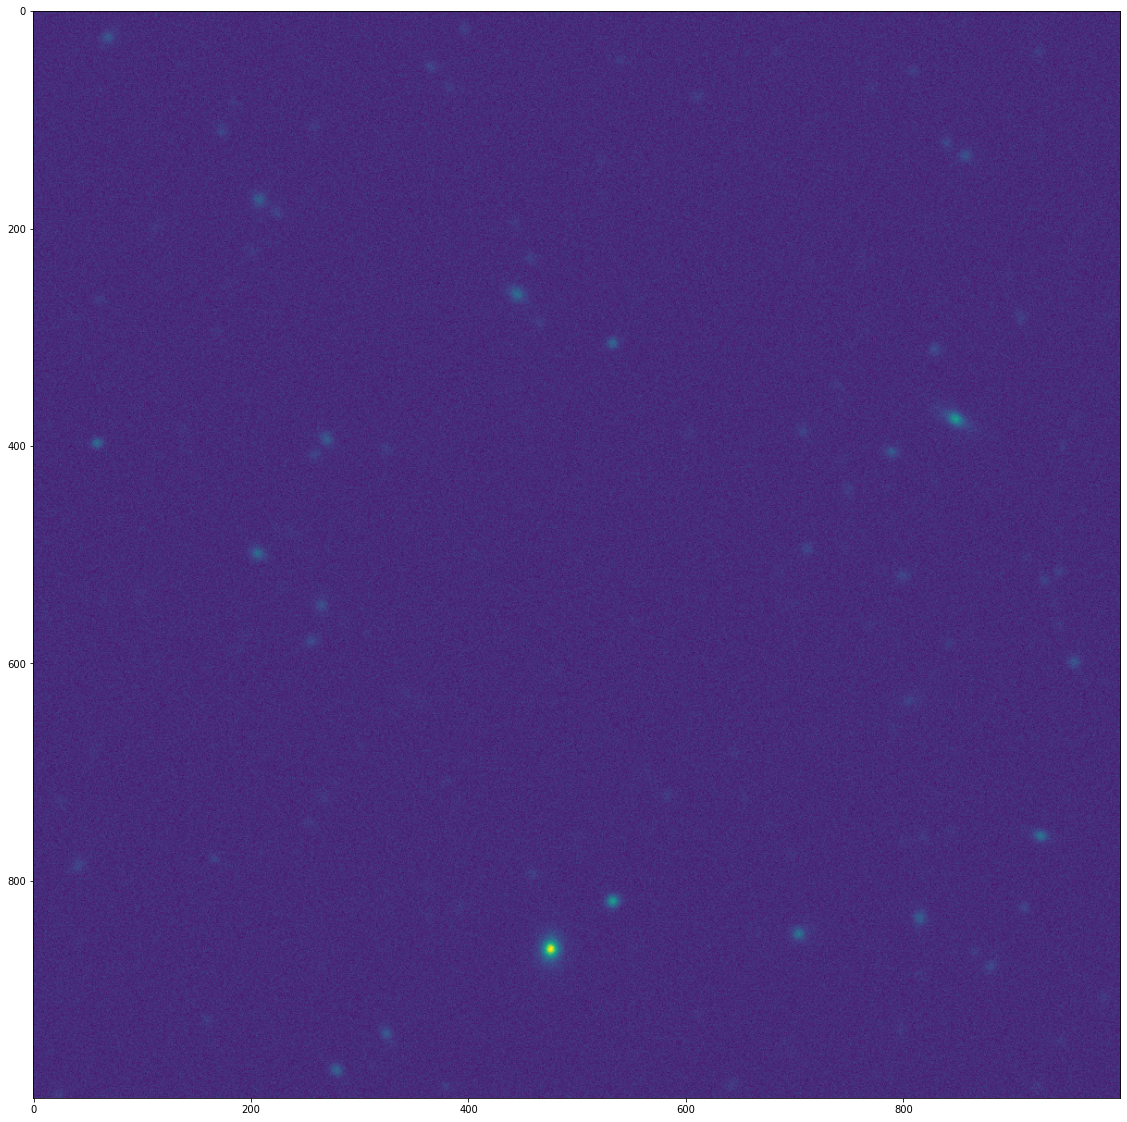

In [76]:
full_image = sim_field(0.1, 0.17, 0.00044, 23.9,)
plt.figure(figsize=(20,20))
plt.imshow(full_image)#, cmap='flag')

In [ ]:
cat = galsim.COSMOSCatalog()
pixel_scale = 0.03
gal = cat.makeGalaxy(100, noise_pad_size=128 * pixel_scale)
full_image = galsim.ImageF(image_size_x, image_size_y)


In [ ]:
cat_param = catalog.param_cat[catalog.orig_index]
sparams = cat_param['sersicfit']
fluxes = np.log10(sparams[:,0])
radii = np.log10(sparams[:,1])
# cat_param = append_fields(cat_param, 'sersic_flux_log10', np.log10(sparams[:,0]))

/Users/hbretonniere/.pyenv/versions/3.7.5/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [ ]:
brights = np.where(fluxes < 0.1)
big = np.where((radii > 2.3) & (radii < 2.4))
big_bright = np.where((radii > 1.1) & (fluxes > -0.4))
big_bright

(array([ 6134, 26789, 37298, 39790]),)

In [ ]:
brights

(array([    0,     1,     2, ..., 81496, 81497, 81498]),)

In [ ]:
big

(array([51665]),)

(array([2.2000e+02, 4.2200e+02, 8.6100e+02, 1.8690e+03, 3.8350e+03,
        6.9560e+03, 1.0689e+04, 1.3913e+04, 1.4590e+04, 1.1919e+04,
        7.9630e+03, 4.4460e+03, 2.1810e+03, 8.9200e+02, 3.6600e+02,
        1.2300e+02, 3.7000e+01, 1.2000e+01, 2.0000e+00, 2.0000e+00]),
 array([3.32128216e-04, 1.24600202e-01, 2.48868277e-01, 3.73136351e-01,
        4.97404425e-01, 6.21672499e-01, 7.45940573e-01, 8.70208647e-01,
        9.94476722e-01, 1.11874480e+00, 1.24301287e+00, 1.36728094e+00,
        1.49154902e+00, 1.61581709e+00, 1.74008517e+00, 1.86435324e+00,
        1.98862131e+00, 2.11288939e+00, 2.23715746e+00, 2.36142554e+00,
        2.48569361e+00]),
 <BarContainer object of 20 artists>)

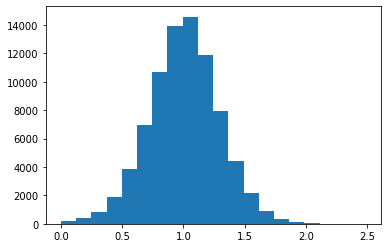

In [ ]:
plt.hist(radii[radii > 1e-4], bins=20)

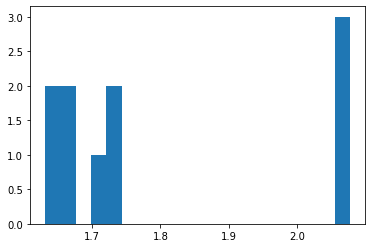

In [ ]:
plt.hist(fluxes[fluxes>1.5], bins=20);


In [ ]:
# gaussian = makeGaussian(10, 0.001)
# fits.writeto('psf.fits', gaussian, overwrite=True)
# # psf = galsim.InterpolatedImage('psf.fits', scale=pixel_scale/6., flux=1)
# psf = gal.original_psf


In [ ]:
# # gal=gal.withFlux(1e-5)
# # gal = galsim.Convolve(psf, gal)
# small_image = galsim.ImageF((128), (128),scale=pixel_scale)
# stamp = gal.drawImage(image=small_image, method='no_pixel').array

In [ ]:
big[0]

array([51665])

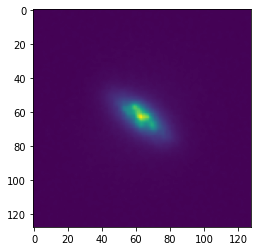

In [ ]:
stamp_gal = galsim.ImageF(128, 128, scale=0.03)
gal = catalog.makeGalaxy(big_bright[0][0], gal_type='real')
psf = gal.original_psf
gal = galsim.Convolve(psf, gal)
img_hsc = gal.drawImage(stamp_gal, method='no_pixel').array
plt.imshow(img_hsc)

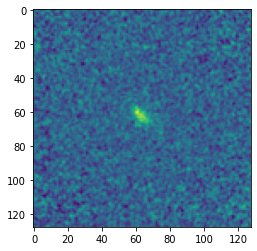

In [ ]:
stamp_gal = galsim.ImageF(128, 128, scale=0.03)
gal = catalog.makeGalaxy(brights[0][0], gal_type='real')
psf = gal.original_psf
gal = galsim.Convolve(psf, gal)
img_hsc = gal.drawImage(stamp_gal, method='no_pixel').array
plt.imshow(img_hsc)

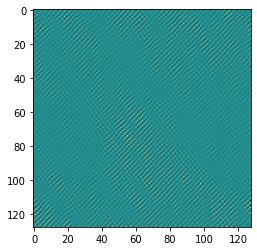

In [ ]:
plt.imshow(stamp)